In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

train = pd.read_csv("sales_train.csv")
train.head(10)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
5,10.01.2013,0,25,2564,349.00,1.0
6,02.01.2013,0,25,2565,549.00,1.0
7,04.01.2013,0,25,2572,239.00,1.0
8,11.01.2013,0,25,2572,299.00,1.0
9,03.01.2013,0,25,2573,299.00,3.0


In [3]:
test = pd.read_csv("sales_test.csv")
test.head(10)

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268
5,5,5,5039
6,6,5,5041
7,7,5,5046
8,8,5,5319
9,9,5,5003


In [8]:
items = pd.read_csv("items.csv")
items.head(10)

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40
5,***НОВЫЕ АМЕРИКАНСКИЕ ГРАФФИТИ (UNI) ...,5,40
6,***УДАР ПО ВОРОТАМ (UNI) D,6,40
7,***УДАР ПО ВОРОТАМ-2 (UNI) D,7,40
8,***ЧАЙ С МУССОЛИНИ D,8,40
9,***ШУГАРЛЭНДСКИЙ ЭКСПРЕСС (UNI) D,9,40


In [18]:
train.dtypes

date               object
date_block_num      int64
shop_id             int64
item_id             int64
item_price        float64
item_cnt_day      float64
dtype: object

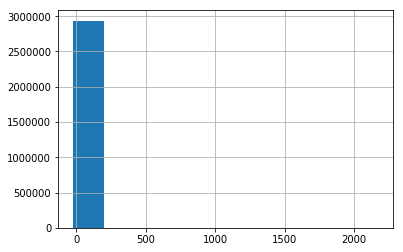

In [20]:
train["item_cnt_day"].hist(bins=10)

In [74]:
train[train["item_cnt_day"]>50].count()

date              523
date_block_num    523
shop_id           523
item_id           523
item_price        523
item_cnt_day      523
dateString        523
month             523
year              523
dtype: int64

In [42]:
train[train["item_id"]==11373].head(10)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
58323,08.01.2013,0,12,11373,1000.000000,1.0
58324,31.01.2013,0,12,11373,97.800000,5.0
176790,01.02.2013,1,12,11373,229.000000,1.0
176791,04.02.2013,1,12,11373,130.000000,1.0
302468,29.03.2013,2,12,11373,139.500000,2.0
302469,27.03.2013,2,12,11373,146.000000,1.0
302470,14.03.2013,2,12,11373,130.000000,1.0
302471,13.03.2013,2,12,11373,287.666667,3.0
302472,12.03.2013,2,12,11373,145.833333,12.0
302473,11.03.2013,2,12,11373,323.000000,2.0


In [41]:
test[test["item_id"]==11373].head(10)

,ID,shop_id,item_id
1596,1596,5,11373
6696,6696,4,11373
11796,11796,6,11373
16896,16896,3,11373
21996,21996,2,11373
27096,27096,7,11373
32196,32196,10,11373
37296,37296,12,11373
42396,42396,28,11373
47496,47496,31,11373


In [52]:
train['dateString'] = train['date'].astype(str)
new = train['dateString'].str.split('.', -1, expand = True) 
train['month'], train['year'] = new[1], new[2]
df = train[["month", "year","date_block_num","shop_id","item_id","item_cnt_day"]]
df.head(10)

,month,year,date_block_num,shop_id,item_id,item_cnt_day
0,01,2013,0,59,22154,1.0
1,01,2013,0,25,2552,1.0
2,01,2013,0,25,2552,-1.0
3,01,2013,0,25,2554,1.0
4,01,2013,0,25,2555,1.0
5,01,2013,0,25,2564,1.0
6,01,2013,0,25,2565,1.0
7,01,2013,0,25,2572,1.0
8,01,2013,0,25,2572,1.0
9,01,2013,0,25,2573,3.0


In [60]:
df = df.groupby(["month", "year","date_block_num","shop_id","item_id"]).agg('sum').reset_index()
df.head(20)

,month,year,date_block_num,shop_id,item_id,item_cnt_day
0,01,2013,0,0,32,6.0
1,01,2013,0,0,33,3.0
2,01,2013,0,0,35,1.0
3,01,2013,0,0,43,1.0
4,01,2013,0,0,51,2.0
5,01,2013,0,0,61,1.0
6,01,2013,0,0,75,1.0
7,01,2013,0,0,88,1.0
8,01,2013,0,0,95,1.0
9,01,2013,0,0,96,1.0


In [63]:
df.isnull().sum().sum()

0

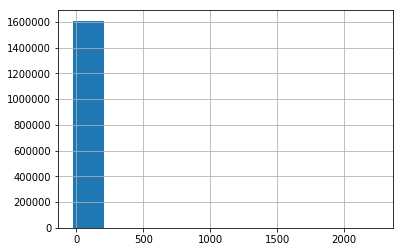

In [71]:
df["item_cnt_day"].hist(bins=10)

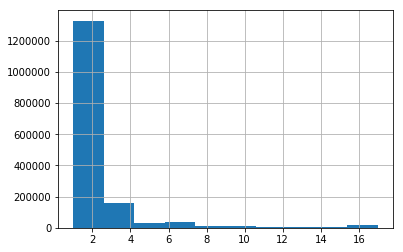

In [118]:
x = df["item_cnt_day"]
upperbound, lowerbound = np.percentile(x, [1,99])
y = np.clip(x, upperbound, lowerbound)
pd.Series(y).hist(bins=10)

/var/dlk/lib/miniconda3/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
/var/dlk/lib/miniconda3/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


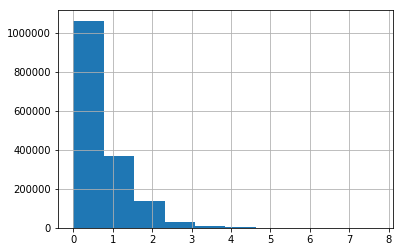

In [81]:
x = np.log(1+df["item_cnt_day"])
x = x[np.isfinite(x)].values
pd.Series(x).hist(bins=10)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1d84ed4080>]],
      dtype=object)

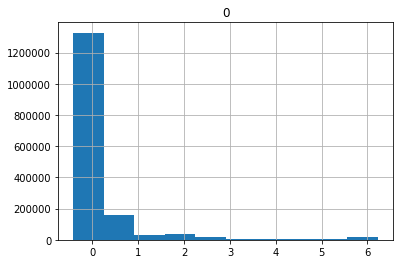

In [119]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
z = scaler.fit_transform(np.array(y).reshape(-1, 1))
pd.DataFrame(z).hist(bins=10)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1d84f23240>]],
      dtype=object)

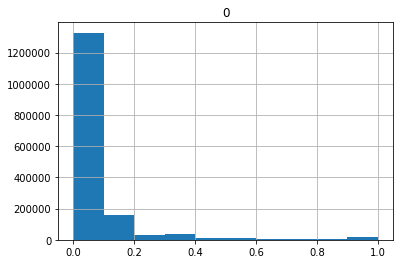

In [120]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
z = scaler.fit_transform(np.array(y).reshape(-1, 1))
pd.DataFrame(z).hist(bins=10)

In [102]:
df["month"] = df["month"].astype(int)
df["year"] = df["year"].astype(int)
df.head()

,month,year,date_block_num,shop_id,item_id,item_cnt_day
0,1,2013,0,0,32,6.0
1,1,2013,0,0,33,3.0
2,1,2013,0,0,35,1.0
3,1,2013,0,0,43,1.0
4,1,2013,0,0,51,2.0


In [103]:
df.dtypes

month               int64
year                int64
date_block_num      int64
shop_id             int64
item_id             int64
item_cnt_day      float64
dtype: object

In [111]:
np.percentile(df["item_cnt_day"], [1,99.5])

array([ 1., 26.])

In [154]:
temp = df[["item_id", "shop_id"]].groupby("item_id").agg('count').reset_index().sort_values("shop_id", ascending=True)
temp[temp["shop_id"]<10].count()
#temp["shop_id"].hist(bins=100)

item_id    7085
shop_id    7085
dtype: int64

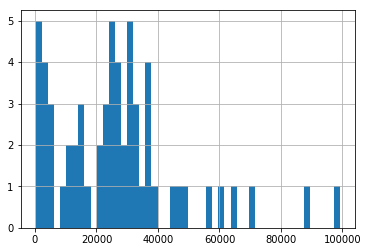

In [135]:
temp = df[["item_id", "shop_id"]].groupby("shop_id").agg('count').reset_index().sort_values("item_id", ascending=False)
temp["item_id"].hist(bins=50)

In [139]:
#small <6000
#6000<medium <40000
#big>40000
temp.head(100)

,shop_id,item_id
36,36,258
11,11,371
20,20,795
9,9,1591
40,40,2235
8,8,2465
1,1,3282
33,33,3544
34,34,4135
23,23,4427


In [155]:
df.head()

,month,year,date_block_num,shop_id,item_id,item_cnt_day
0,1,2013,0,0,32,6.0
1,1,2013,0,0,33,3.0
2,1,2013,0,0,35,1.0
3,1,2013,0,0,43,1.0
4,1,2013,0,0,51,2.0


In [157]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[["month", "year","date_block_num","shop_id","item_id"]], df["item_cnt_day"], test_size=0.25, random_state=42)
X_train.shape, X_test.shape

((1206843, 5), (402281, 5))

In [176]:
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(X_train, y_train)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [177]:
y_pred = model.predict(X_test)

In [179]:
from sklearn.ensemble import RandomForestRegressor
rfg = RandomForestRegressor(n_estimators=500, verbose=2, n_jobs=-1)
rfg.fit(X_train, y_train)

building tree 1 of 500
building tree 2 of 500
building tree 3 of 500
building tree 4 of 500
building tree 5 of 500
building tree 6 of 500
building tree 7 of 500
building tree 8 of 500
building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500
building tree 13 of 500
building tree 14 of 500
building tree 15 of 500
building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500
building tree 21 of 500
building tree 22 of 500
building tree 23 of 500building tree 24 of 500

building tree 25 of 500
building tree 26 of 500


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   10.3s


building tree 27 of 500
building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500
building tree 32 of 500
building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500
building tree 37 of 500
building tree 38 of 500
building tree 39 of 500
building tree 40 of 500
building tree 41 of 500
building tree 42 of 500
building tree 43 of 500
building tree 44 of 500
building tree 45 of 500
building tree 46 of 500
building tree 47 of 500
building tree 48 of 500
building tree 49 of 500
building tree 50 of 500
building tree 51 of 500
building tree 52 of 500
building tree 53 of 500
building tree 54 of 500
building tree 55 of 500
building tree 56 of 500
building tree 57 of 500
building tree 58 of 500
building tree 59 of 500
building tree 60 of 500
building tree 61 of 500
building tree 62 of 500
building tree 63 of 500
building tree 64 of 500
building tree 65 of 500
building tree 66 of 500
building tree 67 of 500
building tree 68

[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:  1.5min


building tree 147 of 500
building tree 148 of 500
building tree 149 of 500
building tree 150 of 500
building tree 151 of 500
building tree 152 of 500
building tree 153 of 500
building tree 154 of 500
building tree 155 of 500
building tree 156 of 500
building tree 157 of 500
building tree 158 of 500
building tree 159 of 500
building tree 160 of 500
building tree 161 of 500
building tree 162 of 500
building tree 163 of 500
building tree 164 of 500
building tree 165 of 500
building tree 166 of 500
building tree 167 of 500
building tree 168 of 500
building tree 169 of 500
building tree 170 of 500
building tree 171 of 500
building tree 172 of 500
building tree 173 of 500
building tree 174 of 500
building tree 175 of 500
building tree 176 of 500
building tree 177 of 500
building tree 178 of 500
building tree 179 of 500
building tree 180 of 500
building tree 181 of 500
building tree 182 of 500
building tree 183 of 500
building tree 184 of 500
building tree 185 of 500
building tree 186 of 500


[Parallel(n_jobs=-1)]: Done 333 tasks      | elapsed:  3.8min


building tree 350 of 500
building tree 351 of 500
building tree 352 of 500
building tree 353 of 500
building tree 354 of 500
building tree 355 of 500
building tree 356 of 500
building tree 357 of 500
building tree 358 of 500
building tree 359 of 500
building tree 360 of 500
building tree 361 of 500
building tree 362 of 500
building tree 363 of 500
building tree 364 of 500
building tree 365 of 500
building tree 366 of 500
building tree 367 of 500
building tree 368 of 500
building tree 369 of 500
building tree 370 of 500
building tree 371 of 500
building tree 372 of 500
building tree 373 of 500
building tree 374 of 500
building tree 375 of 500
building tree 376 of 500
building tree 377 of 500
building tree 378 of 500
building tree 379 of 500
building tree 380 of 500
building tree 381 of 500
building tree 382 of 500
building tree 383 of 500
building tree 384 of 500
building tree 385 of 500
building tree 386 of 500
building tree 387 of 500
building tree 388 of 500
building tree 389 of 500


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  5.7min finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=False, random_state=None, verbose=2, warm_start=False)

In [180]:
rfg.predict(X_test)

[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    2.4s
[Parallel(n_jobs=16)]: Done 130 tasks      | elapsed:    9.4s
[Parallel(n_jobs=16)]: Done 333 tasks      | elapsed:   20.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:   30.5s finished


array([1.612, 1.252, 1.33 , ..., 1.296, 1.338, 1.872])

In [181]:
y_test

954911      1.0
1043055     1.0
639825      1.0
257249      3.0
1596414     2.0
297461      1.0
200291      1.0
1313672     1.0
531441      0.0
689274      1.0
40706       1.0
635942      1.0
675105      3.0
820044      1.0
403227      4.0
1152051     1.0
1608020     1.0
1125607     1.0
1451183     2.0
627310      1.0
125350      1.0
710370      1.0
432508      1.0
1340333     1.0
1175495     1.0
248998      7.0
38796       1.0
1282302     1.0
1404726     1.0
913365      1.0
           ... 
979495      1.0
921438      2.0
838378      1.0
1524529     1.0
400617      3.0
380858      3.0
892639      3.0
1098532     2.0
544406      6.0
1233110     2.0
1043963     1.0
1275909     2.0
261226      1.0
478599      1.0
1062665     1.0
1011938     1.0
1469148    22.0
285273      1.0
1230779     1.0
1410686     3.0
379342     33.0
1279681     1.0
1264093     6.0
227053      1.0
1442301     1.0
569488      1.0
1461894     1.0
708962      1.0
1438346     2.0
283221      1.0
Name: item_cnt_day, Leng

In [182]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

54.14106490634415